In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

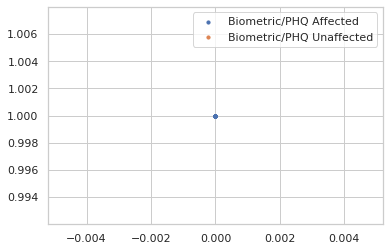

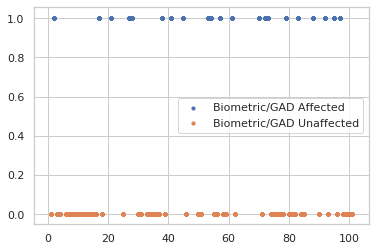

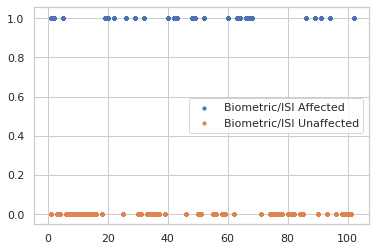

In [3]:
def load_data(path):
    df = pandas.read_csv(path)
    return df
if __name__ == '__main__':
    #training data below; loads data from CSVs for PHQ/GAD/ISI vs biometric
    phqbiodata = load_data(r"rhrphq")
    
    #starts with resting_hr and moves on to comparing other metrics to PHQ scores
    phqscoresy = phqbiodata.iloc[:, 1]
    phqX = phqbiodata.iloc[:, 4:9]
    phqbio_affected=phqbiodata.loc[phqscoresy == 1]
    phqbio_unaffected = phqbiodata.loc[phqscoresy == 0]
    
    plt.scatter(phqbio_affected.iloc[:, 0], phqbio_affected.iloc[:, 1], s=10, label = 'Biometric/PHQ Affected')
    plt.scatter(phqbio_unaffected.iloc[:, 0], phqbio_unaffected.iloc[:, 1], s=10, label = 'Biometric/PHQ Unaffected')
    plt.legend()
    plt.show()
    
    #loads data from CSV for GAD vs. biometric variables
    gadbiodata = load_data(r"gadbio")
    gadbiodata.head()
    
    gadscoresy = gadbiodata.iloc[:, 1]
    gadX = gadbiodata.iloc[:, 3:8]
    gadbio_affected=gadbiodata.loc[gadscoresy == 1]
    gadbio_unaffected=gadbiodata.loc[gadscoresy == 0]
    
    plt.scatter(gadbio_affected.iloc[:,0], gadbio_affected.iloc[:, 1], s=10, label = 'Biometric/GAD Affected')
    plt.scatter(gadbio_unaffected.iloc[:, 0], gadbio_unaffected.iloc[:, 1], s=10, label = 'Biometric/GAD Unaffected')
    plt.legend()
    plt.show()
    
    #loads data from CSV for ISI vs biometric variables
    sleepbiodata = load_data(r"sleepbio")
    sleepbiodata.head()
    
    sleepscoresy = sleepbiodata.iloc[:, 1]
    isiX = sleepbiodata.iloc[:, 3:8]
    sleepbio_affected = sleepbiodata.loc[sleepscoresy == 1]
    sleepbio_unaffected = sleepbiodata.loc[sleepscoresy == 0]
    
    plt.scatter(sleepbio_affected.iloc[:, 0], sleepbio_affected.iloc[:, 1], s=10, label = 'Biometric/ISI Affected')
    plt.scatter(sleepbio_unaffected.iloc[:, 0], sleepbio_unaffected.iloc[:, 1], s=10, label= 'Biometric/ISI Unaffected')
    plt.legend()
    plt.show()

In [4]:
#gets value counts for PHQ score vs. Biometric data (0 being unaffected and 1 being affected)
print(phqbiodata['score'].value_counts())
#gets value counts for GAD score vs. Biometric data (0 being unaffected and 1 being affected)
print(gadbiodata['score'].value_counts())
#gets value counts for ISI score vs. Biometric data (0 being unaffected and 1 being affected)
print(sleepbiodata['score'].value_counts())

0    12050
1     2207
Name: score, dtype: int64
0    12020
1     5392
Name: score, dtype: int64
0    12020
1     6663
Name: score, dtype: int64


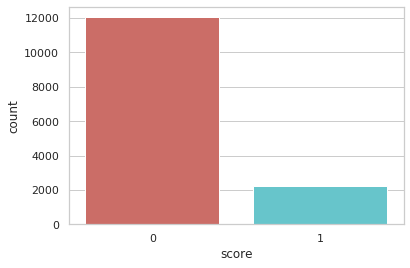

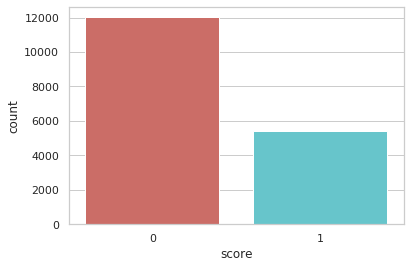

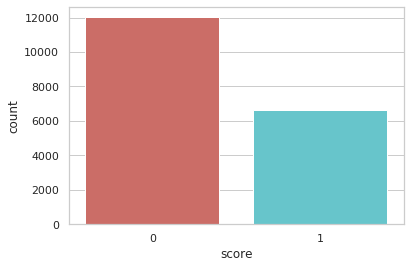

<Figure size 432x288 with 0 Axes>

In [5]:
sns.countplot(x = 'score', data=phqbiodata, palette='hls') #shows count_plot of distribution of PHQ scores
plt.show()
plt.savefig('phqcount_plot')

sns.countplot(x = 'score', data = gadbiodata, palette='hls')
plt.show()
plt.savefig('gadcount_plot')

sns.countplot(x='score', data=sleepbiodata, palette='hls')
plt.show()
plt.savefig('isicount_plot')

In [6]:
#Displays percentages of affected + unaffected users 

#PHQ vs. Biometric Data
count_nodepression = len(phqbiodata[phqbiodata['score']==0])
count_depression = len(phqbiodata[phqbiodata['score']==1])
nodep_percent = count_nodepression/(count_depression+count_nodepression)
print('No Depression: ', nodep_percent*100)
dep_percent = count_depression/(count_depression+count_nodepression)
print('Depression: ', dep_percent*100)


#GAD vs. Biometric Data
count_noanx = len(gadbiodata[gadbiodata['score']==0])
count_anx = len(gadbiodata[gadbiodata['score']==1])
noanx_percent = count_noanx/(count_anx+count_noanx)
print('No Anxiety: ', noanx_percent*100)
anx_percent = count_anx/(count_anx+count_noanx)
print('Anxiety: ', anx_percent*100)

#ISI vs. Biometric Data
count_noinsomnia = len(sleepbiodata[sleepbiodata['score']==0])
count_insomnia = len(sleepbiodata[sleepbiodata['score']==1])
noinsom_percent = count_noinsomnia/(count_insomnia+count_noinsomnia)
print('No Insomnia: ', noinsom_percent*100)
insom_percent = count_insomnia/(count_insomnia+count_noinsomnia)
print('Insomnia: ', insom_percent*100)

No Depression:  84.51988496878727
Depression:  15.480115031212737
No Anxiety:  69.03285090742017
Anxiety:  30.96714909257983
No Insomnia:  64.33656265053791
Insomnia:  35.66343734946208


In [7]:
#shows distribution of avg values of each column/factor given test score
phqbiodata.groupby('score').mean()

gadbiodata.groupby('score').mean()

sleepbiodata.groupby('score').mean()

,user_id,steps,sleep,mins_sedentary,mins_exercise,resting_hr
score,,,,,,
0,49.388519,9990.448835,479.472379,400.231531,160.761647,74.557321
1,47.183851,5086.690680,151.535044,624.713042,20.469008,86.861774


In [8]:
import scipy
#preparing data for training model
phqX = numpy.c_[numpy.ones((phqX.shape[0], 1)), phqX]
gadX = numpy.c_[numpy.ones((gadX.shape[0], 1)), gadX]
isiX = numpy.c_[numpy.ones((isiX.shape[0], 1)), isiX]

theta_phq = numpy.zeros((phqX.shape[1], 1))
theta_gad = numpy.zeros((gadX.shape[1], 1))
theta_isi = numpy.zeros((isiX.shape[1], 1))

#manual logistic regression model/not using sklearn
def sigmoid(x):
    return (1/(1+numpy.exp(-x)))

#sigmoid maps values between 0 and 1 (activation)

def net_input(theta, x):
    #returns weighted sums of input
    return numpy.dot(x, theta)

def probability(theta, x):
    #returns prob after sigmoid
    return sigmoid(net_input(theta, x))

def cost_function(theta, x, y):
    #calculates cost for training samples
    m = x.shape[0]
    total_cost= -(1/m)*numpy.sum(
            y*numpy.log(probability(theta, x)) + (1-y) * numpy.log(
            1-probability(theta, x)))
    return total_cost

def gradient(theta, x, y):
    #calcs gradient of cost function at theta
    m = x.shape[0]
    return (1/m)*numpy.dot(x.T, sigmoid(net_input(theta, x))-y)

def fit(x, y, theta):
    #finds model parameters that minimize cost function
    opt_weights = scipy.optimize.fmin_tnc(func=cost_function, x0=theta, fprime=gradient, args=(x,y.flatten()))
    return opt_weights[0]

# parameters=fit(X, y, theta)

In [9]:
from sklearn.preprocessing import StandardScaler

phqscaled_features = phqbiodata.copy()
gadscaled_features = gadbiodata.copy()
isiscaled_features = sleepbiodata.copy()
col_names = ['steps', 'sleep', 'mins_exercise', 'mins_sedentary', 'resting_hr']
phqfeatures = phqscaled_features[col_names]
gadfeatures = gadscaled_features[col_names]
isifeatures = isiscaled_features[col_names]

phqscaler = StandardScaler().fit(phqfeatures.values)
gadscaler = StandardScaler().fit(gadfeatures.values)
isiscaler = StandardScaler().fit(isifeatures.values)

phqfeatures = phqscaler.transform(phqfeatures.values)
gadfeatures = gadscaler.transform(gadfeatures.values)
isifeatures = isiscaler.transform(isifeatures.values)

phqscaled_features[col_names]=phqfeatures
gadscaled_features[col_names]=gadfeatures
isiscaled_features[col_names]=isifeatures



In [10]:
(p_phq, n_phq) = phqX.shape
(p_gad, n_gad) = gadX.shape
(p_isi, n_isi) = isiX.shape

#initializes theta with all zeros
theta_phq = numpy.zeros((n_phq+1,1))  
theta_gad = numpy.zeros((n_gad+1,1))
theta_isi = numpy.zeros((n_isi+1,1))

#appending column with values of ones/Depression, Anxiety, insomnia
ones_phq = numpy.ones((p_phq, 1)) 
ones_gad = numpy.ones((p_gad, 1))
ones_isi = numpy.ones((p_isi, 1))

#stacks data horizontally (by columns)
phqX = numpy.hstack((ones_phq, phqX))
gadX = numpy.hstack((ones_gad, gadX))
isiX = numpy.hstack((ones_isi, isiX))

#splits data into training and testing datasets
from sklearn.model_selection import train_test_split, cross_val_score
X_train_phq, X_test_phq, Y_train_phq, Y_test_phq = train_test_split(phqX, phqscoresy, test_size = 0.25, random_state=0)
print(X_train_phq.shape)
print(X_test_phq.shape)
print(Y_train_phq.shape)
print(Y_test_phq.shape)
X_train_gad, X_test_gad, Y_train_gad, Y_test_gad = train_test_split(gadX, gadscoresy, test_size = 0.25, random_state=0)
X_train_isi, X_test_isi, Y_train_isi, Y_test_isi = train_test_split(isiX, sleepscoresy, test_size=0.25, random_state=0)

(10692, 6)
(3565, 6)
(10692,)
(3565,)


In [11]:
#defining sigmoid function
m_phq = len(Y_train_phq)  #10692 training samples for PHQ vs biometric data
m_gad = len(Y_train_gad) #13059 training samples for GAD vs biometric
m_isi = len(Y_train_isi)  #14012 training samples for ISI vs biometric
print(m_phq, m_gad, m_isi)
def sigmoid(x):
    return(1/(1+numpy.exp(-x)))

sigmoid(phqX)
sigmoid(gadX)
sigmoid(isiX)

10692 13059 14012


array([[0.73105858, 0.73105858, 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.73105858, 0.73105858, 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.73105858, 0.73105858, 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.73105858, 0.73105858, 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.73105858, 0.73105858, 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.73105858, 0.73105858, 1.        , ..., 1.        , 1.        ,
        1.        ]])

In [90]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#builds logistic regression model for PHQ scores vs. biometric data
model_phq = LogisticRegression()
phqscoresy = numpy.array(phqscoresy)
model_phq.fit(phqX, phqscoresy)
predicted_classes_phq = model_phq.predict(phqX)
accuracy_phq = accuracy_score(phqscoresy.flatten(), predicted_classes_phq)
parameters_phq = model_phq.coef_
print(parameters_phq)
print(accuracy_phq)

#builds logistic regression model for GAD scores vs. biometric data
model_gad = LogisticRegression()
gadscoresy = numpy.array(gadscoresy)
model_gad = model_gad.fit(gadX, gadscoresy)
predicted_classes_gad = model_gad.predict(gadX)
accuracy_gad = accuracy_score(gadscoresy.flatten(), predicted_classes_gad)
parameters_gad = model_gad.coef_
print(parameters_gad)
print(accuracy_gad)

#builds logistic regression model for ISI scores vs. biometric data
model_isi = LogisticRegression()
print(sleepscoresy.shape)
sleepscoresy = numpy.array(sleepscoresy)
print(isiX.shape)
model_isi = model_isi.fit(isiX, sleepscoresy)
predicted_classes_isi = model_isi.predict(isiX)
accuracy_isi = accuracy_score(sleepscoresy.flatten(), predicted_classes_isi)
parameters_isi = model_isi.coef_
print(parameters_isi)
print(accuracy_isi)

(14257,)
[[-2.90875598e-05 -2.90875598e-05 -2.90875598e-05 -2.90875598e-05
  -8.91150172e-04 -1.25405888e-02  2.26018395e-02 -8.42910289e-02
   2.49644912e-02]]
0.9933366065792243
[[ 6.26710787e-05  6.26710787e-05  6.26710787e-05  6.26710787e-05
  -2.48948844e-04 -4.30480539e-02  3.11492283e-02 -2.29442840e-02
   8.83358205e-03]]
0.9997128417183552
(18683,)
(18683, 9)


/home/vagrant/src/fitkit/fitkit/env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/vagrant/src/fitkit/fitkit/env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/vagrant/src/fitkit/fitkit/env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 6.35907804e-05  6.35907804e-05  6.35907804e-05  6.35907804e-05
   8.09528019e-05 -4.49467516e-02  2.80955555e-02 -7.34274976e-03
   4.82116983e-03]]
0.9982872129743617


In [27]:
import pickle
pickle.dump(model_isi, open('isi.pkl', 'wb'))
pickle.dump(model_gad, open('gad.pkl', 'wb'))
pickle.dump(model_phq, open('phq.pkl', 'wb'))